In [1]:
!pip install ucimlrepo  --quiet
from visualization_utils import *
from file_utils import * 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets
# metadata 
metadata = predict_students_dropout_and_academic_success.metadata

# variable information 
variable_info = predict_students_dropout_and_academic_success.variables

df = X
df['dropout'] = y

print(f"{df.shape[0]} entries with {df.shape[1]} features")

4424 entries with 37 features


In [3]:
predict_students_dropout_and_academic_success.variables['name']
ds_vars = predict_students_dropout_and_academic_success.variables['name']
ds_desc = predict_students_dropout_and_academic_success.variables['description']
# need to create forward mappings for each one of the variables
hard_vars = {'Application mode',
'Application order',
'Previous qualification (grade)',
'Admission grade',
'Age at enrollment',
"Curricular units 1st sem (credited)",
"Curricular units 1st sem (enrolled)",
"Curricular units 1st sem (evaluations)",
"Curricular units 1st sem (approved)",
"Curricular units 1st sem (grade)",
"Curricular units 1st sem (without evaluations)",
"Curricular units 2nd sem (credited)",
"Curricular units 2nd sem (enrolled)",
"Curricular units 2nd sem (evaluations)",
"Curricular units 2nd sem (approved)",
"Curricular units 2nd sem (grade)",
"Curricular units 2nd sem (without evaluations)",
"Unemployment rate",
"Inflation rate",
"GDP",
"Target",
}

variable_map = generate_variable_map(hard_vars, ds_vars, ds_desc)

In [4]:
df.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

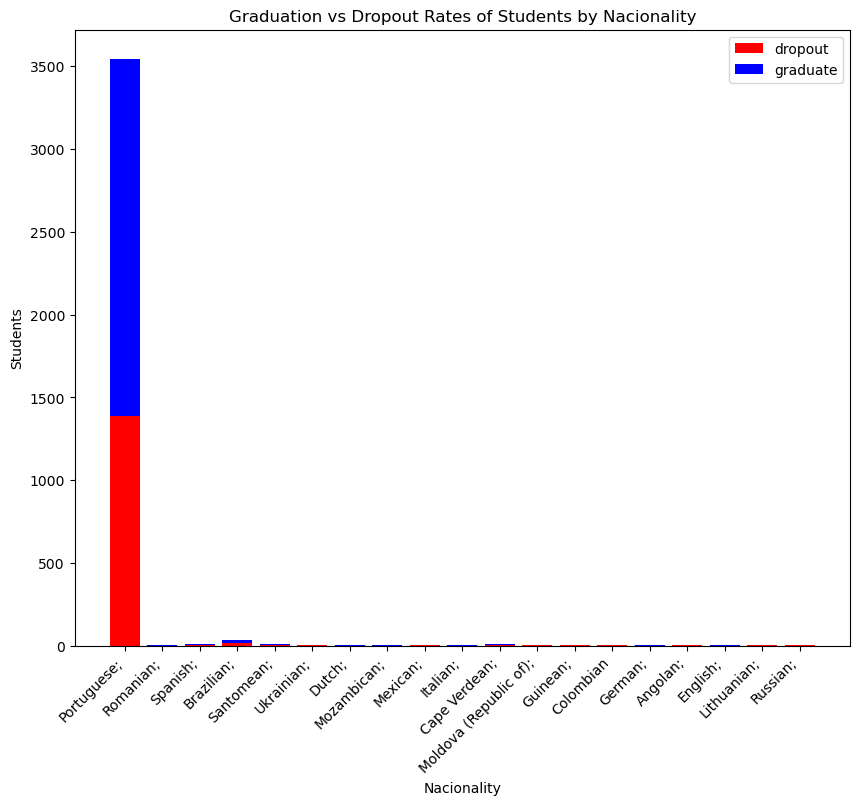

In [5]:
finished_df = df[df['dropout'].isin(['Dropout', 'Graduate'])]
generate_general_stacked_bar_graph(finished_df, variable_map, 'Nacionality')




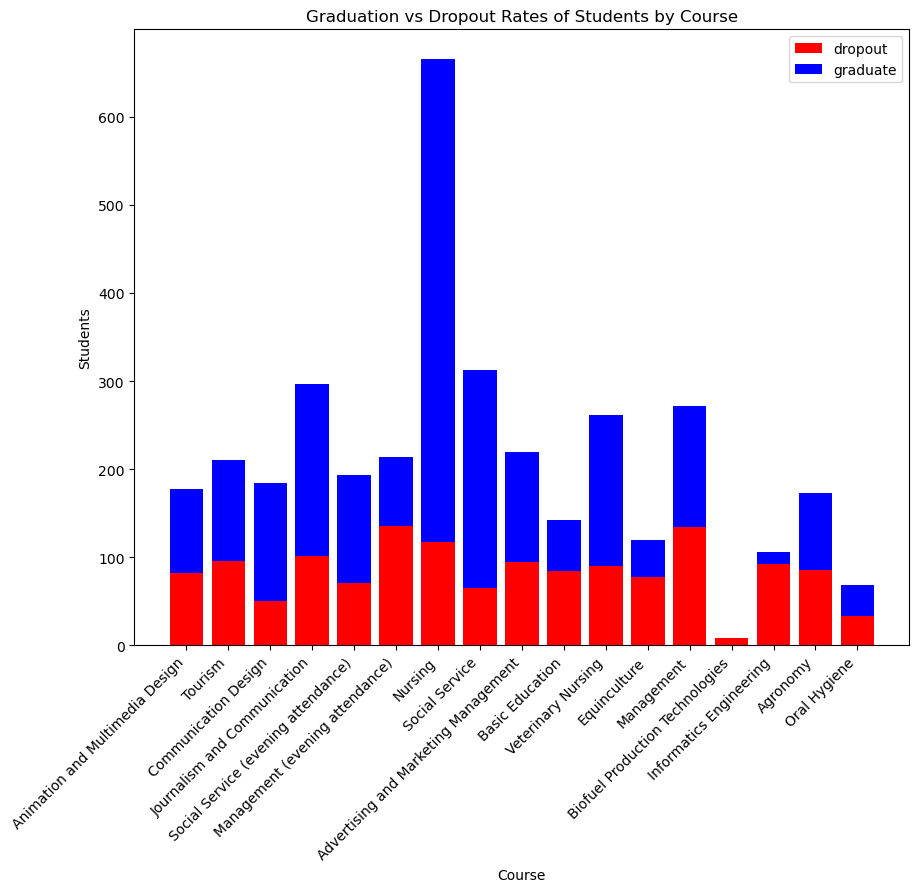

In [6]:
generate_general_stacked_bar_graph(finished_df, variable_map, 'Course')


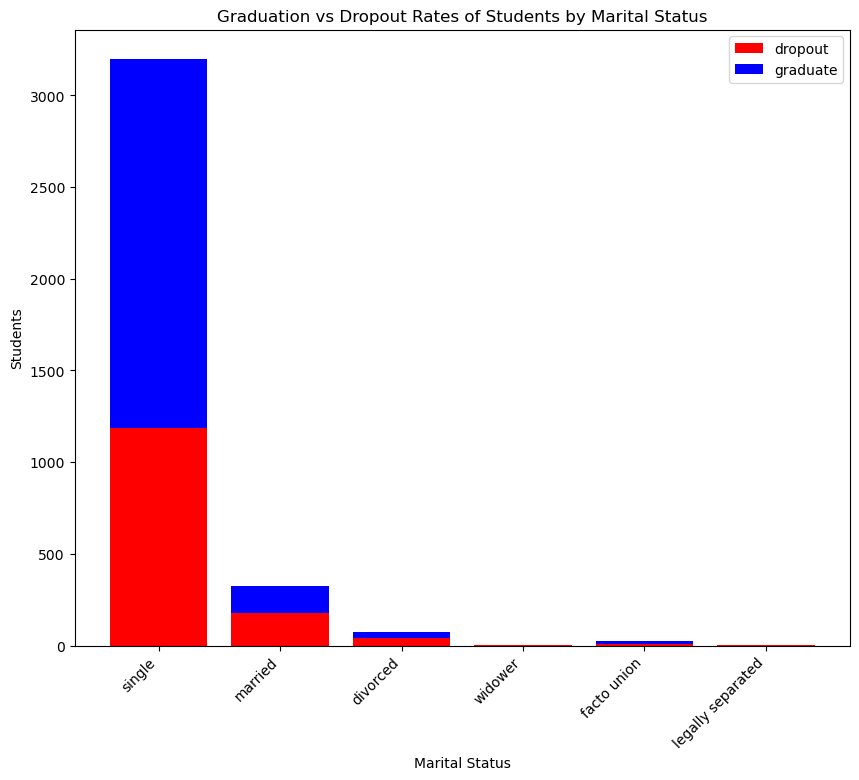

In [7]:
generate_general_stacked_bar_graph(finished_df, variable_map, 'Marital Status')


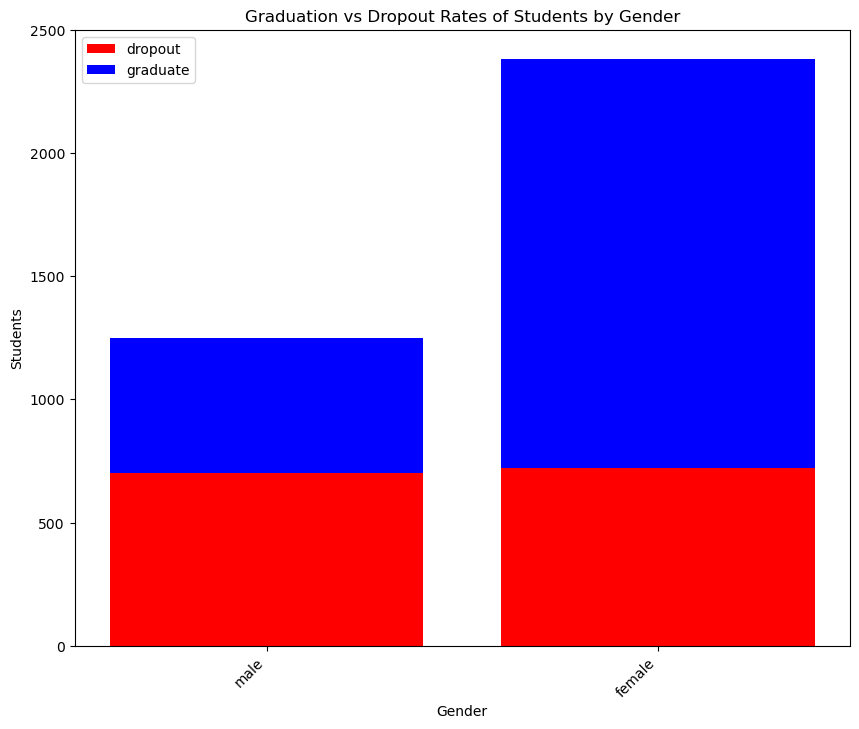

In [8]:
generate_general_stacked_bar_graph(finished_df, variable_map, 'Gender')


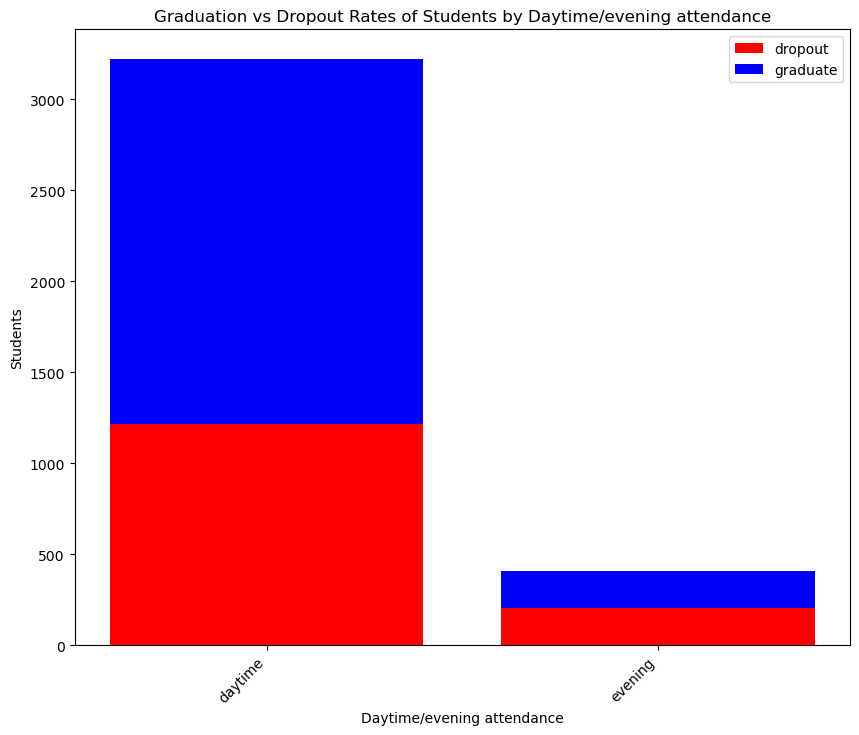

In [9]:
generate_general_stacked_bar_graph(finished_df, variable_map, 'Daytime/evening attendance')

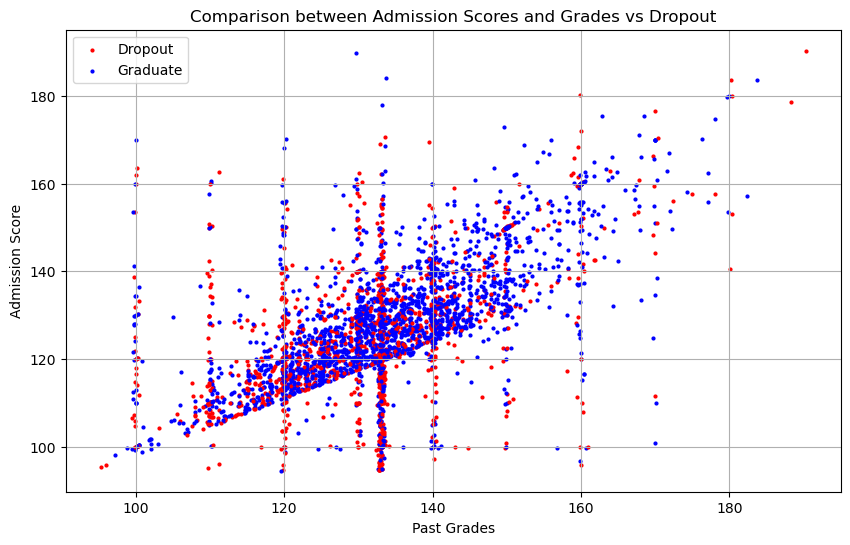

In [10]:
PREV_QUAL = 'Previous qualification (grade)'
ADMISSION_GRADE = 'Admission grade' 
tmp = df[[PREV_QUAL, ADMISSION_GRADE, 'dropout']]
finished_df = tmp[tmp['dropout'].isin(['Dropout', 'Graduate'])]

jitter_plot(finished_df)

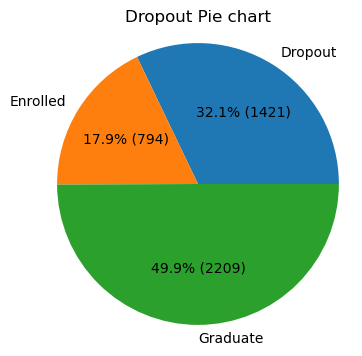

In [11]:
pie_chart(df['dropout'])


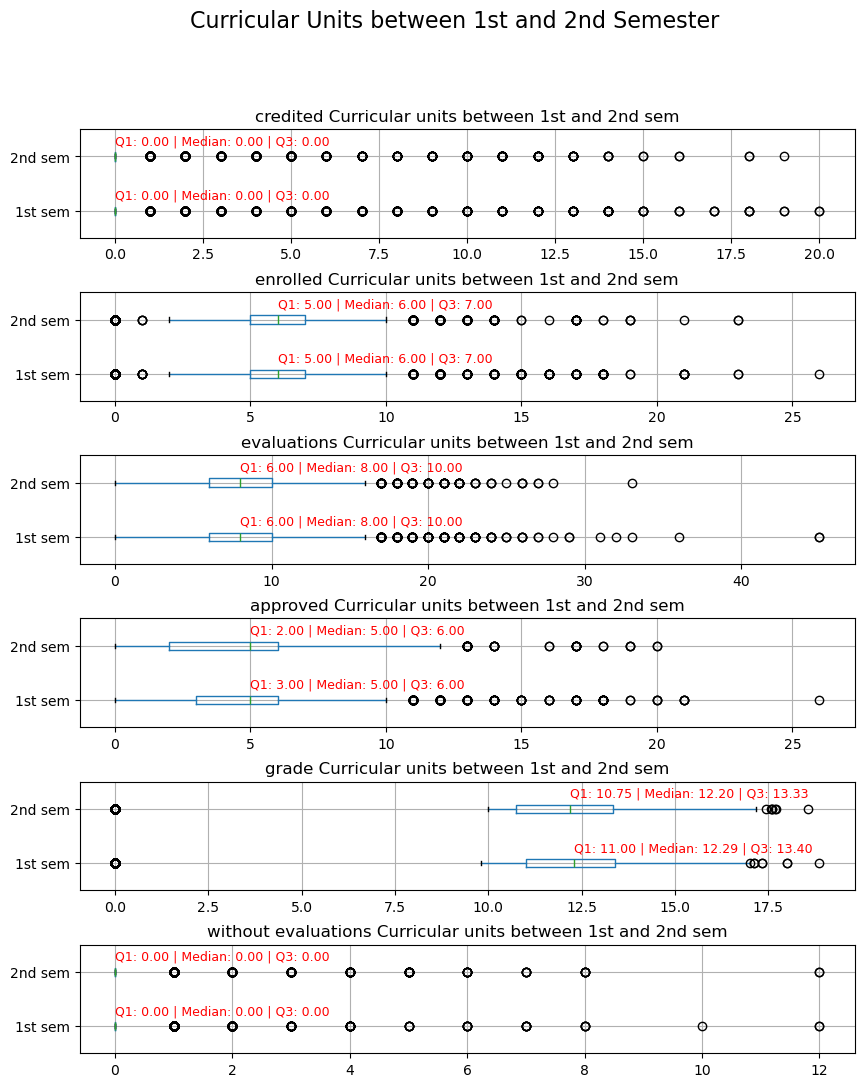

In [12]:
curriculum_units = [
    "Curricular units 1st sem (credited)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (without evaluations)",
]
first_sem_curriculum = {unit for unit in curriculum_units if '1' in unit}
second_sem_curriculum = set(curriculum_units) - first_sem_curriculum

plot_semester_compare_bp(df, curriculum_units)

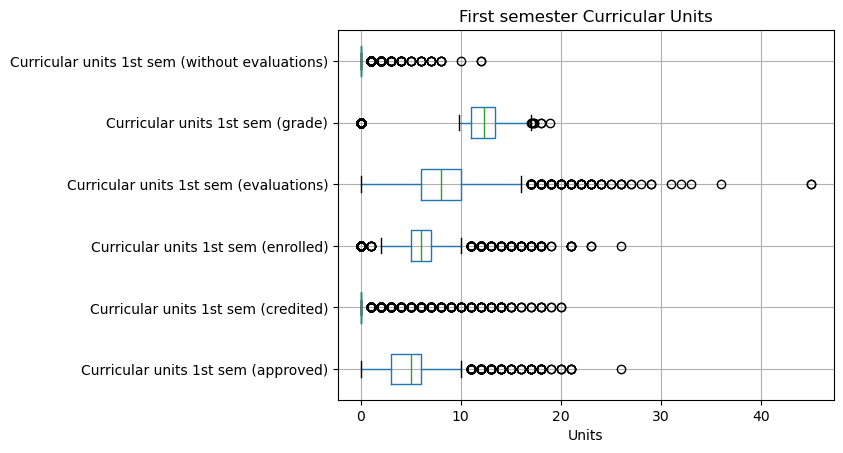

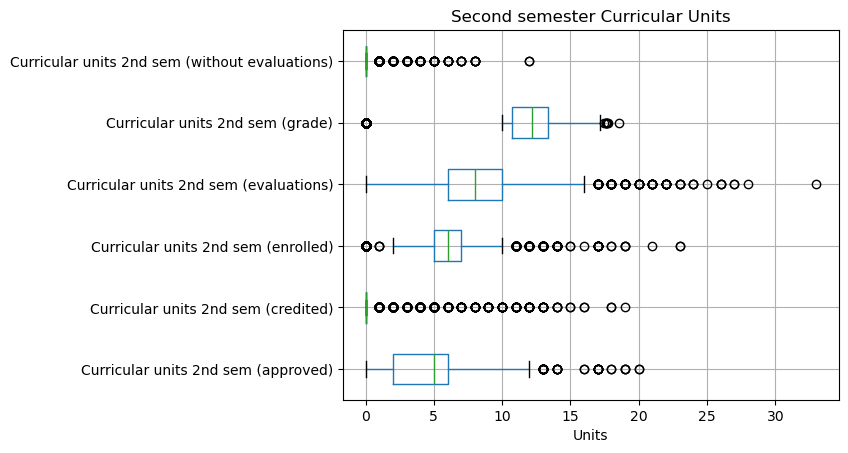

In [13]:
# will not plot first and semester comparison
df[sorted(list(first_sem_curriculum))].boxplot(vert=False)
plt.title("First semester Curricular Units")
plt.xlabel("Units")
plt.show()
df[sorted(list(second_sem_curriculum))].boxplot(vert=False)
plt.title("Second semester Curricular Units")
plt.xlabel("Units")
plt.show()


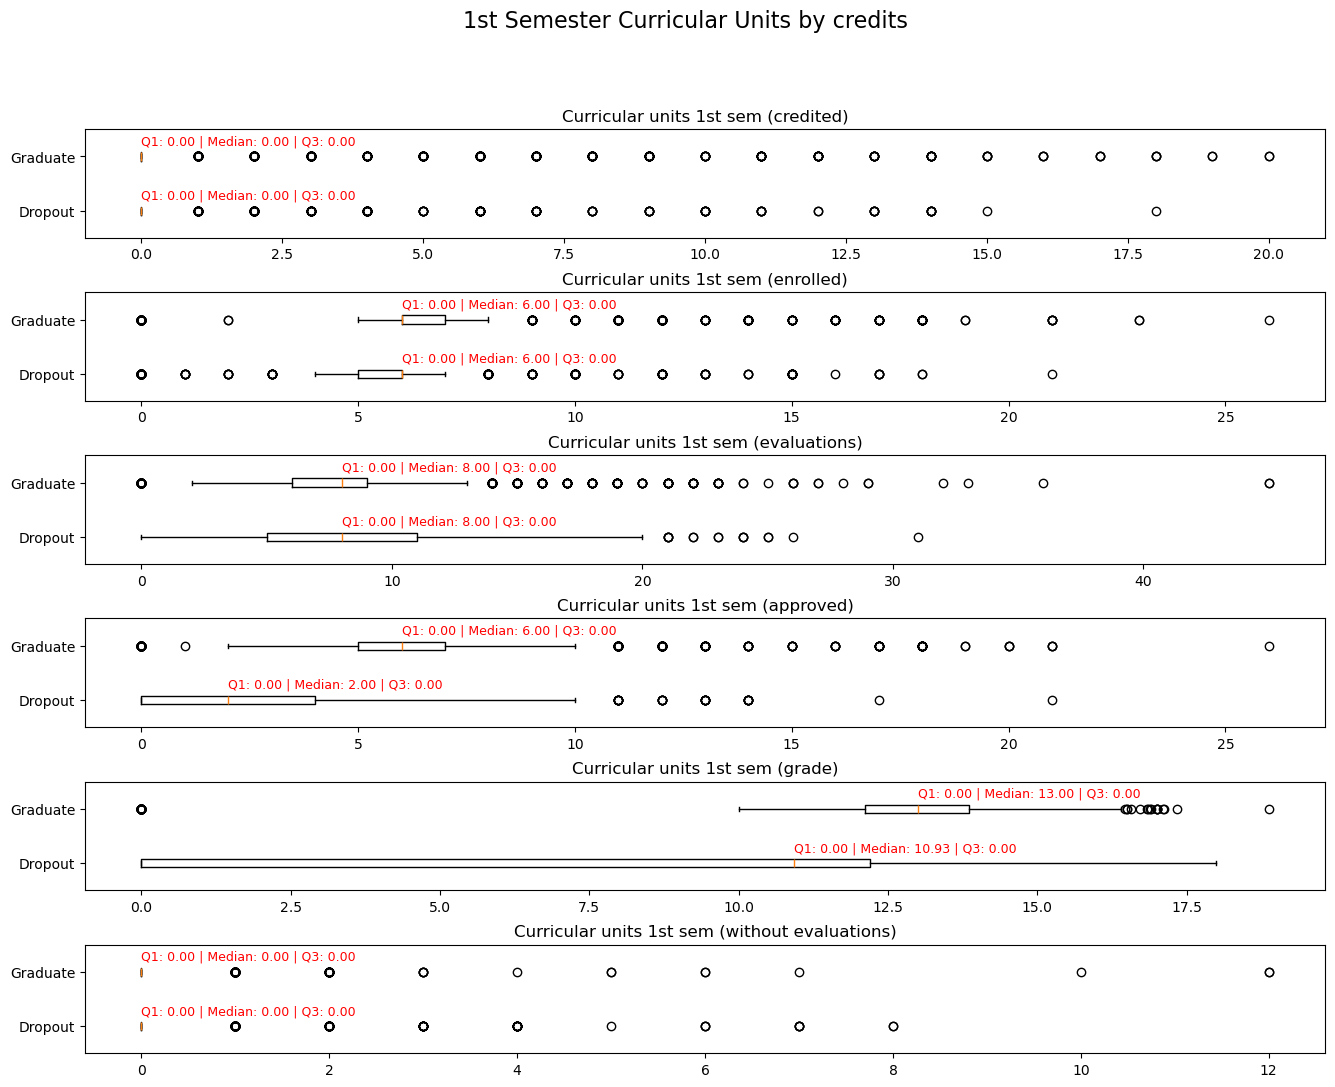

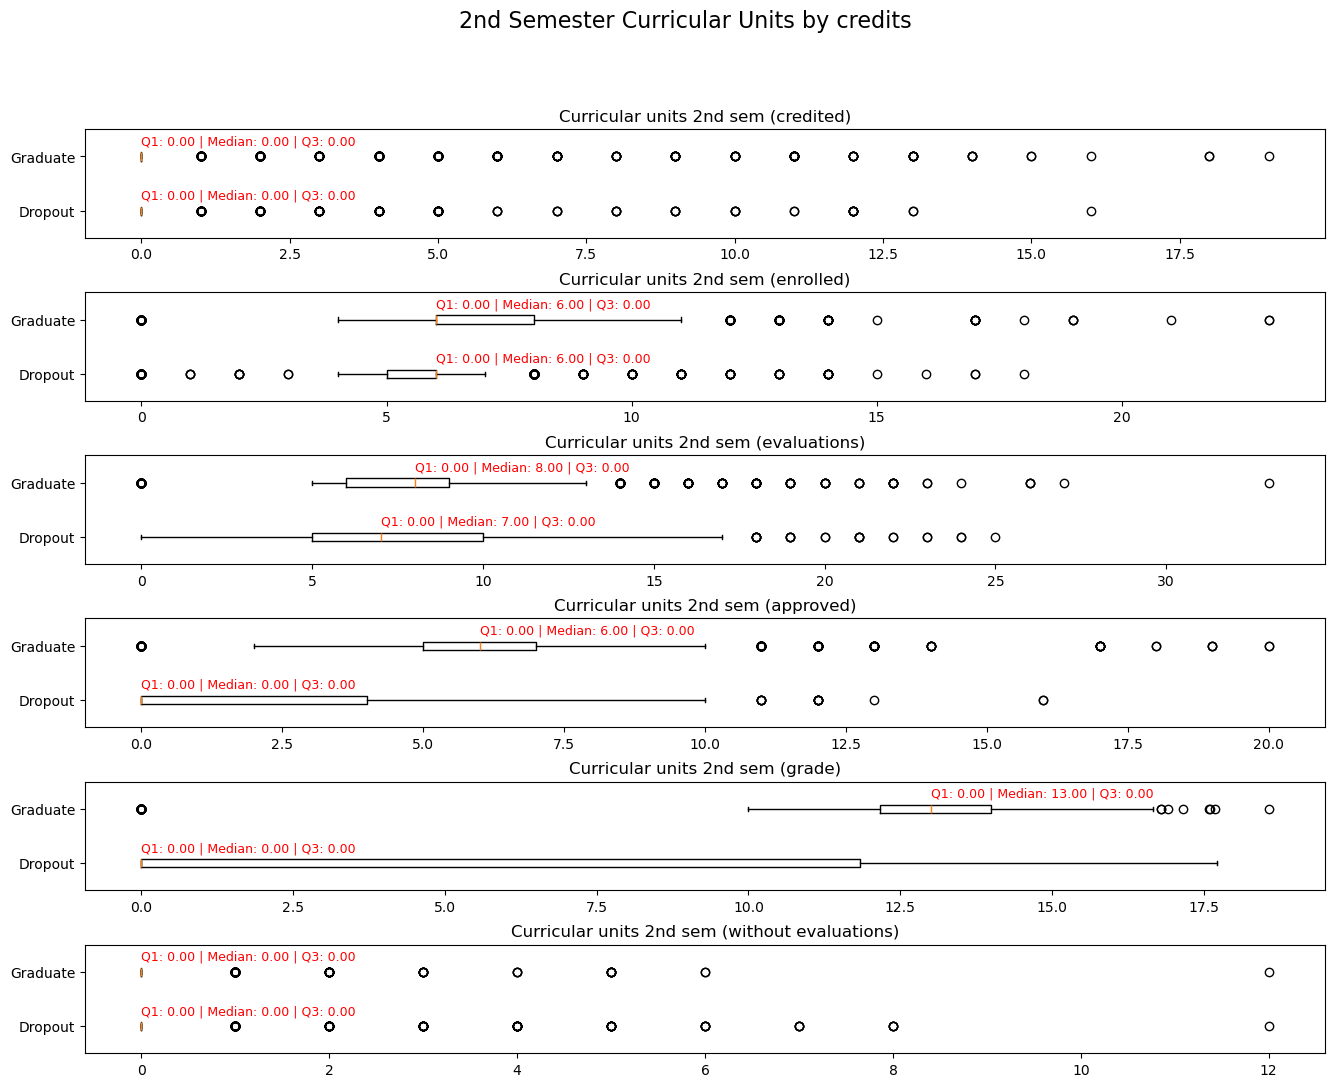

In [14]:
plot_grad_drop_compare_bp(df, curriculum_units, '1')
plot_grad_drop_compare_bp(df, curriculum_units, '2')

In [15]:
df.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

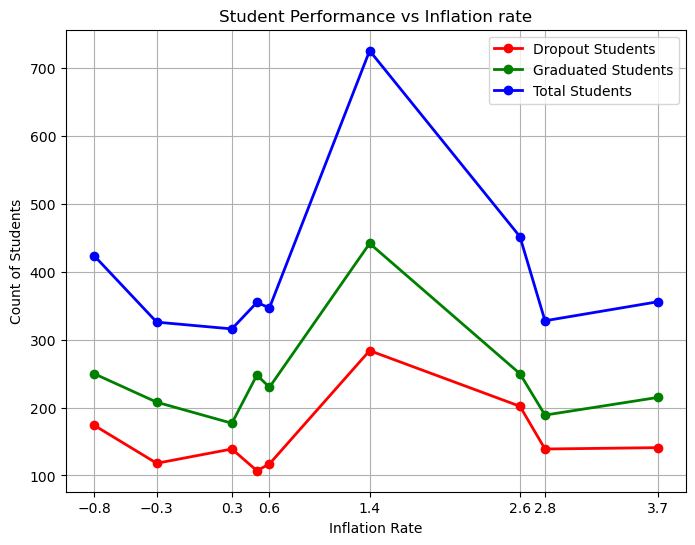

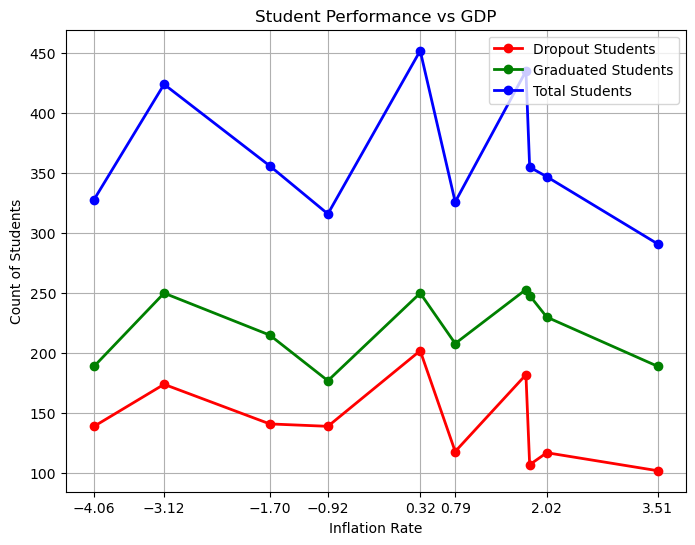

In [16]:
plot_line_graph(df, 'Inflation rate')
plot_line_graph(df, 'GDP')